In [1]:
import numpy as np
import pandas as pd
import librosa
import os
import pickle
import matplotlib.pyplot as plt
fpath='/Users/langchenfan/Documents/Hackathon/test_files_mono/' # file path, to be modified

/Users/langchenfan/HackathonProj/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


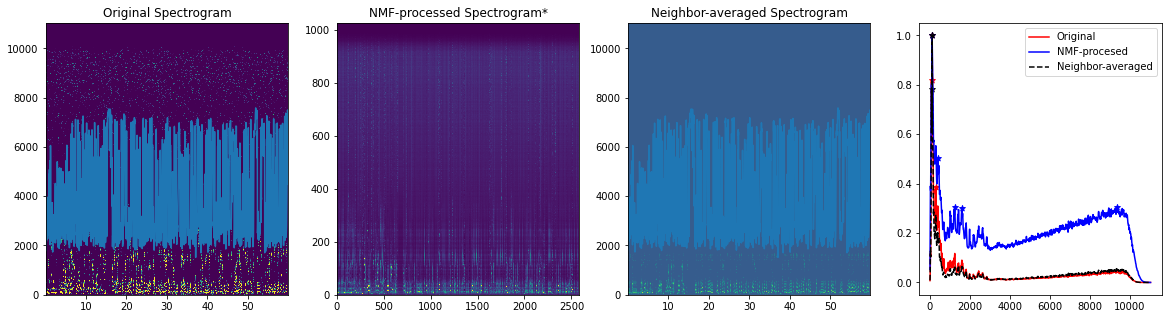

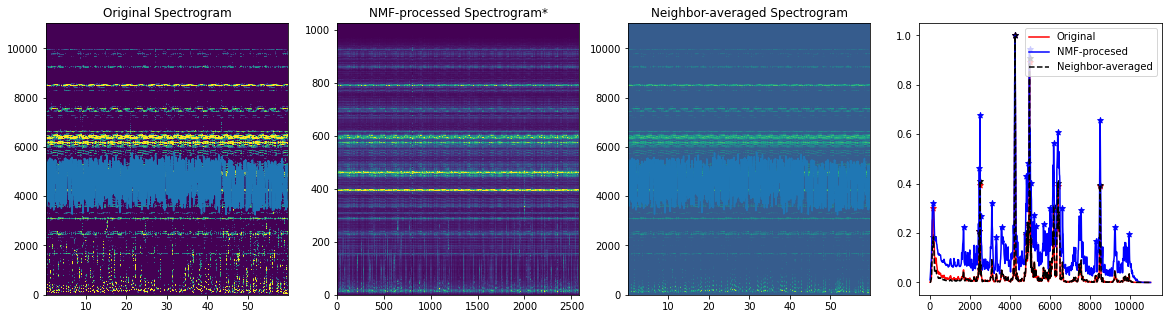

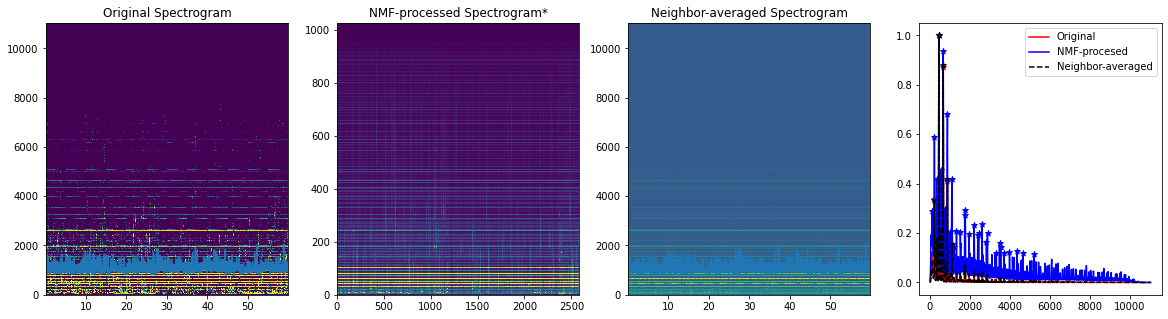

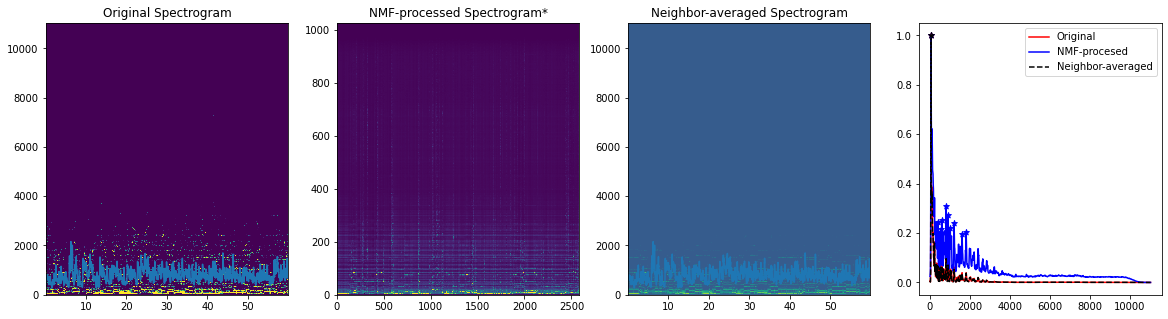

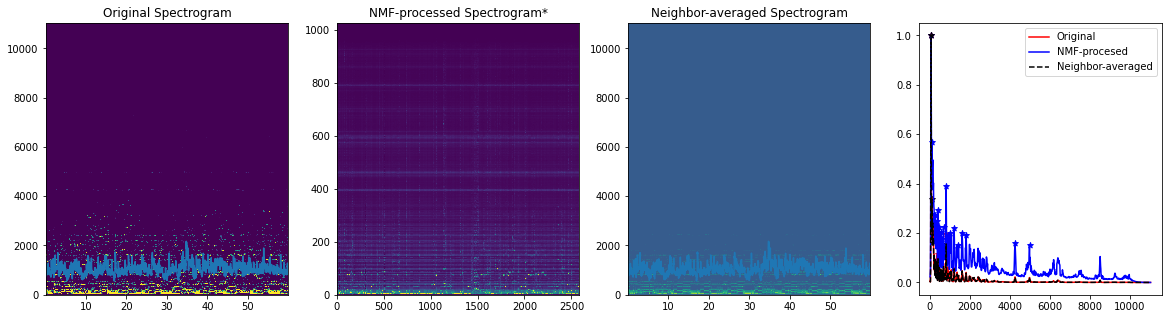

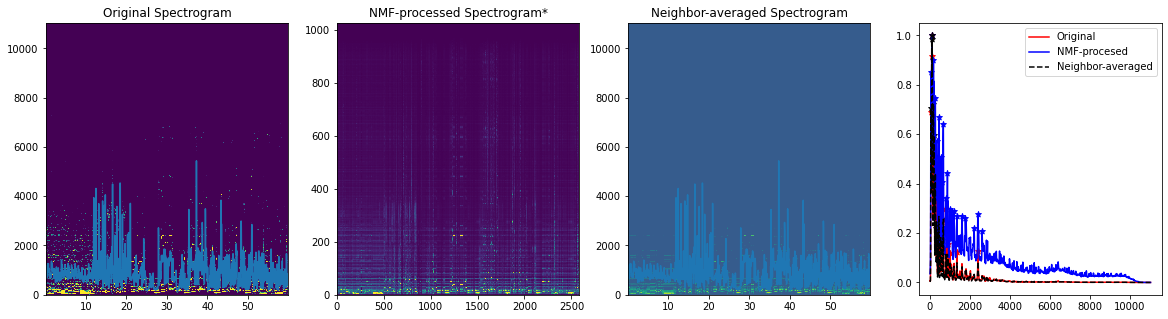

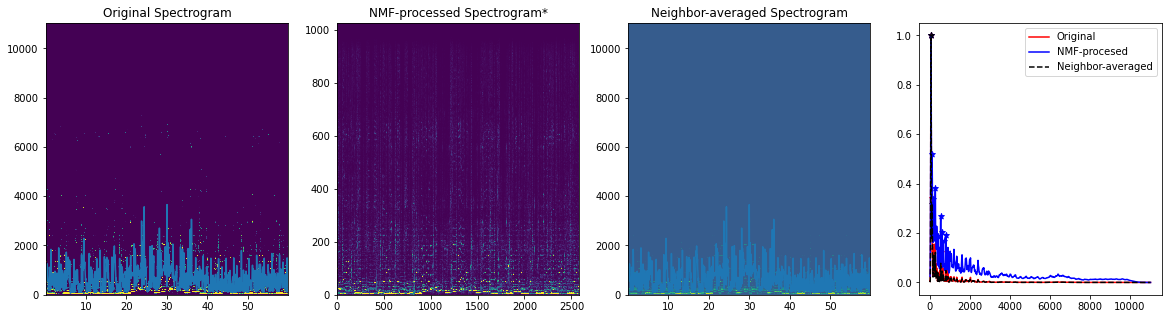

In [19]:
# Plot example spetrograms of audio clips with various noise
import scipy.signal as signal
fnames = ['KDGE_1_static_SNR-6','KDGE_2_glitch_SNR-6','KDGE_3_buzz_SNR-6',\
          'KDGE_10_static_SNR12','KDGE_11_glitch_SNR12','KDGE_12_buzz_SNR12','KDGE_13_static_SNRinf']

for i in range(len(fnames)):
    fname = fnames[i]
    y,fs = librosa.load(fpath+fname+'.wav')
    fig,ax = plt.subplots(1,4,figsize=(20,5))
    f,t,Sxx = signal.spectrogram(y,fs,window='hann',nperseg=2048,nfft=2048,noverlap=1536)
    ax[0].pcolormesh(t,f,librosa.amplitude_to_db(Sxx),clim=[-100,-80])
    # img = display.specshow(librosa.amplitude_to_db(S),sr=fs,y_axis='log',x_axis='time',ax=ax[0])
    ax[0].set(title='Original Spectrogram')
    cent1 = librosa.feature.spectral_centroid(S=Sxx,freq=f) # find spectral centroids
    ax[0].plot(t,cent1.flatten())
    spec1 = Sxx.sum(axis=1)
    # decompose with NMF and reconstruct signal
    S = np.abs(librosa.stft(y))
    comps,acts = librosa.decompose.decompose(S)
    S2=comps.dot(acts)
    ax[1].pcolormesh(S2,clim=[0,50])
    ax[1].set(title='NMF-processed Spectrogram*')
    spec2 = S2.sum(axis=1)
    # neighbor-averaged spectrogram
    S3=librosa.decompose.nn_filter(Sxx)
    ax[2].pcolormesh(t,f,librosa.amplitude_to_db(S3),clim=[-120,-50])
    ax[2].set(title='Neighbor-averaged Spectrogram')
    cent3 = librosa.feature.spectral_centroid(S=Sxx,freq=f)
    ax[2].plot(t,cent3.flatten())
    spec3 = S3.sum(axis=1)

    spec1/=max(spec1)
    spec2/=max(spec2)
    spec3/=max(spec3)
    ax[3].plot(f,spec1,color='r')
    ax[3].plot(f,spec2,color='b')
    ax[3].plot(f,spec3,color='k',linestyle='--')
    # find and plot spectral peaks
    pkind1,prop = signal.find_peaks(spec1,prominence=0.1)
    ax[3].scatter(f[pkind1],spec1[pkind1],color='r',marker='*')
    pkind2,prop = signal.find_peaks(spec2,prominence=0.1)
    ax[3].scatter(f[pkind2],spec2[pkind2],color='b',marker='*')
    pkind3,prop = signal.find_peaks(spec3,prominence=0.1)
    ax[3].scatter(f[pkind3],spec3[pkind3],color='k',marker='*')
    plt.legend(['Original','NMF-procesed','Neighbor-averaged'])